In [30]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import k3d


plt.style.use(['science', 'notebook', 'grid'])
# plt.style.use(['dark_background'])

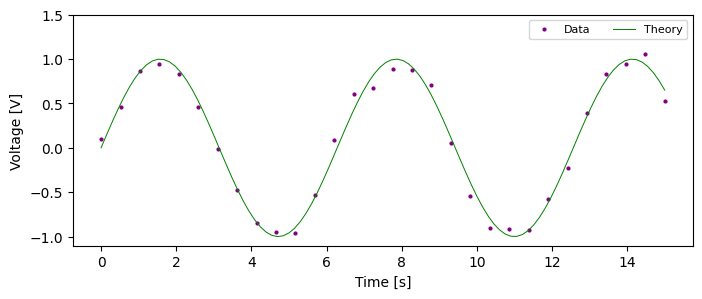

In [3]:
x = np.linspace(0,15,30)
y = np.sin(x) + 0.1 * np.random.randn(len(x))
plt.figure(figsize=(8,3))
plt.plot(x,y, 'o', color='purple', lw=0.5, ms=2, label='Data')
x2 = np.linspace(0,15,100)
y2 = np.sin(x2)
plt.plot(x2, y2, '-', color='green', lw=0.7, ms=4, label='Theory')


plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.ylim(top=1.5)
plt.legend(loc='upper right', fontsize=8, ncol=2)

# Scalar and Vector Valued functions

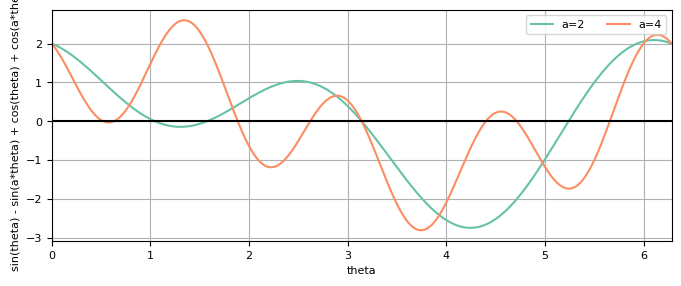

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

sp.init_printing()

a = sp.symbols('a', real=True, nonzero=True)
th = sp.symbols('theta', real=True)
f = sp.Function('f')
g = sp.Function('g')

f = sp.cos(th) - sp.sin(a*th)
g = sp.sin(th) + sp.cos(a*th)

display(sp.solve(f+g, th))

fg_np = sp.lambdify((th, a), f+g, 'numpy')

fig, ax = plt.subplots(1, figsize=(8, 3))
theta_range = np.linspace(0, 2*np.pi, 750)
colors = plt.cm.Set2.colors

for a_val, color in zip([2,4], colors):
    plt.plot(theta_range, fg_np(theta_range, a_val), color=color, label=f'a={a_val}')

plt.axhline(0, color='black')
plt.xticks()

plt.xlabel('theta', fontsize=8)
plt.ylabel(f+g, fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(loc='upper right', fontsize=8, ncol=2)
plt.grid()
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()






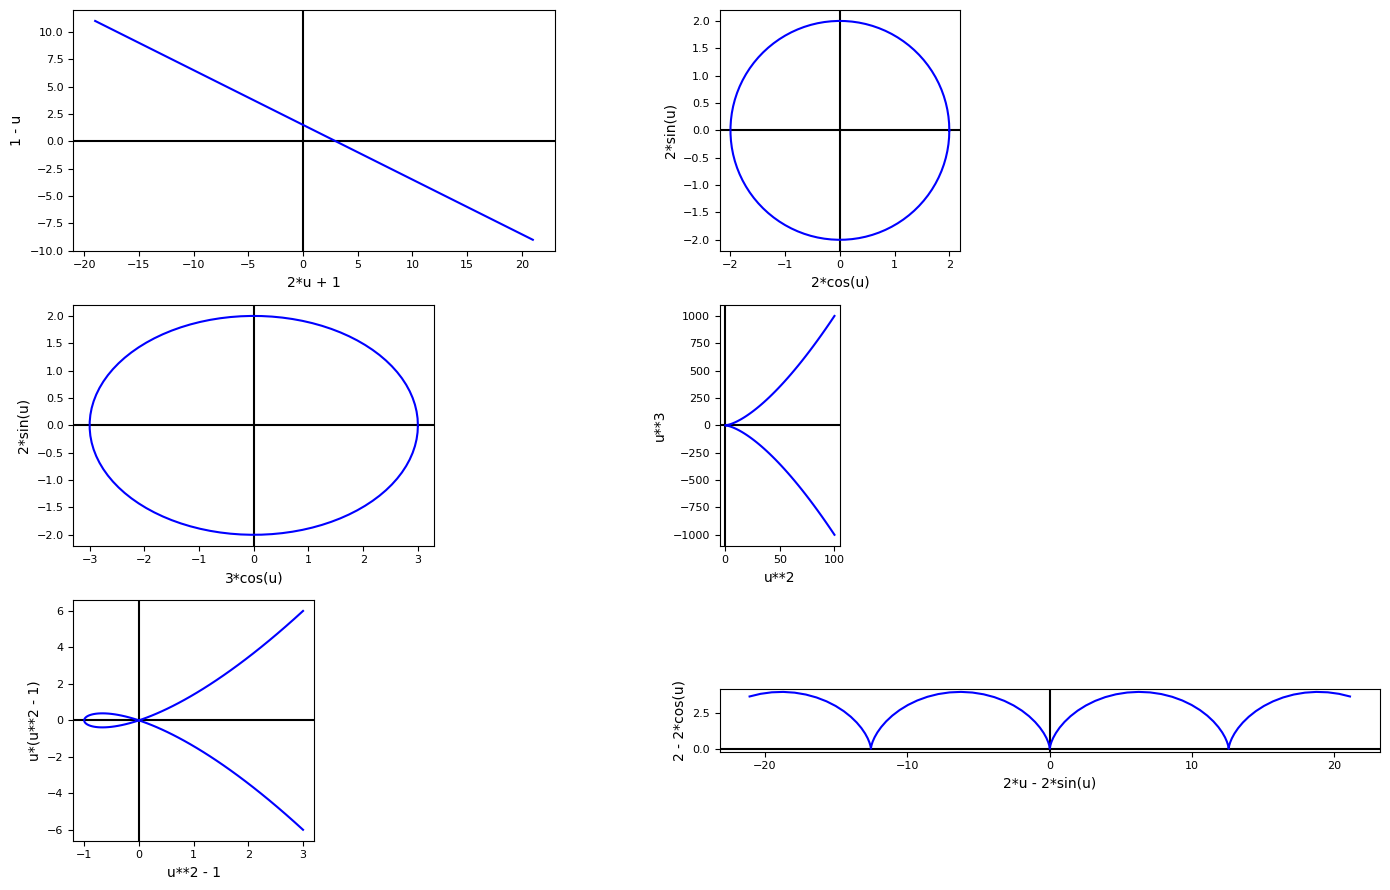

In [5]:
import matplotlib.ticker as ticker


def plot2d(ax: plt.Axes, param, range, xf, yf, *, yaspect: float = 1.0, debug=False, color='blue', fmt='-', label=None):
    param_range = np.linspace(range[0], range[1], range[2])
    f = sp.lambdify((param), xf)
    if debug:
        display(xs)
        display(ys)
    xs = f(param_range)
    g = sp.lambdify((param), yf)
    ys = g(param_range)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.set_xlabel(xf)
    ax.set_ylabel(yf)
    ax.set_aspect(yaspect, anchor='W')
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')

    ax.plot(xs, ys, fmt, color=color, label=label)

fig, axes = plt.subplots(3, 2,figsize=(14,9))

u = sp.symbols('u')
plot2d(axes[0][0], u, (-10,10,100), 1 + 2*u, 1 - u)

u_range = np.linspace(0, np.pi, 100)
f = 2*sp.cos(u)
fl = sp.lambdify((u), f)
# display(fl)
# display(u_range)
xs = fl(u_range)
# display(xs)

plot2d(axes[0][1], u, (0, 2*np.pi, 100), 2*sp.cos(u), 2*sp.sin(u))
plot2d(axes[1][0], u, (0, 2*np.pi, 100), 3*sp.cos(u), 2*sp.sin(u))
plot2d(axes[1][1], u, (-10, 10, 100), u**2, u**3, yaspect=1/10)
plot2d(axes[2][0], u, (-2, 2, 100), u**2-1, u*(u**2-1), yaspect=1/3)
plot2d(axes[2][1], u, (-10, 10, 100), 2*u - 2*sp.sin(u), 2 - 2*sp.cos(u))


fig.tight_layout()
plt.show()



# Exercises 2.1


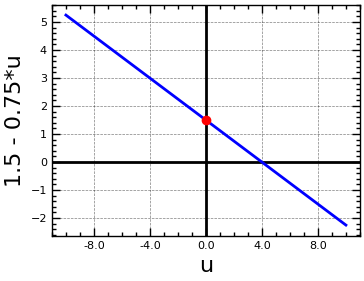

In [97]:
# 2.1(a)
fig, axes = plt.subplots(1,1 ,figsize=(8,3))

plot2d(axes, u, (-5,5, 10), u, 1.5 -0.75*u)
axes.plot(0, 1.5, 'ro')


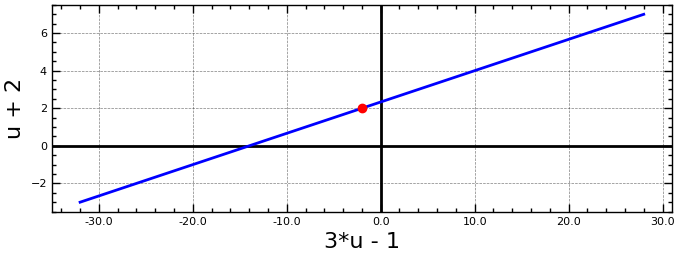

In [95]:
# 2.1(b)
fig, axes = plt.subplots(1,1 ,figsize=(8,3))

plot2d(axes, u, (-5,5, 10), -1 + 3*u, 2 + u)
axes.plot(-1,2, 'ro')

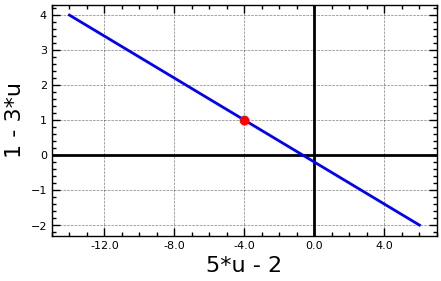

In [111]:
# 2.1(d)
fig, axes = plt.subplots(1,1 ,figsize=(8,3))

rotate = sp.Matrix([[0,1],[-1,0]])

v = rotate*sp.Matrix([3,5])
p = sp.Matrix([-2,1])

l = p + u*v

plot2d(axes, u, (-1,1, 10), l[0], l[1])
axes.plot(p[0], p[1], 'ro')

In [117]:
# 2.1(d)

l = sp.Matrix([1,1,0,-1]) + u*sp.Matrix([1,-2, 3, -1]) 
l

⎡ u + 1 ⎤
⎢       ⎥
⎢1 - 2⋅u⎥
⎢       ⎥
⎢  3⋅u  ⎥
⎢       ⎥
⎣-u - 1 ⎦

'triplet: 25, 52'

'1625 + 3380 = 4225'

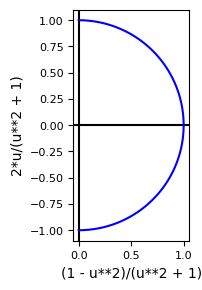

In [6]:
# Ex 2.1.2 

fig, axes = plt.subplots(1,1 ,figsize=(8,3))

x = (1-u**2)/(1 + u**2)
y = (2*u)/(1 + u**2)

plot2d(axes, u, (-1, 1, 100), x, y)

# Pythagorean triplets: Taking rational values of u, we can find x,y which are rational and meet the equation.

xtr = x.subs(u, sp.Rational(2, 3))
ytr = y.subs(u, sp.Rational(1, 2))

display(f"triplet: {xtr*65}, {ytr*65}")
display(f"{xtr*65**2} + {ytr*65**2} = {65**2}")



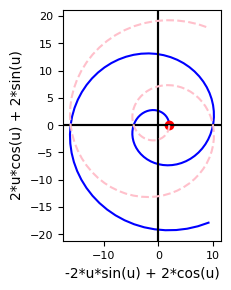

In [7]:
#Ex 2.1.3

fig, axes = plt.subplots(1,1 ,figsize=(8,3))

# assume a = 2
x = 2*(sp.cos(u) - u*sp.sin(u))
y = 2*(sp.sin(u) + u*sp.cos(u))

plot2d(axes, u, (0, 10, 100), x, y)
axes.plot(2,0, 'ro')
plot2d(axes, u, (0, -10, 100), x, y, color='pink', fmt="--")


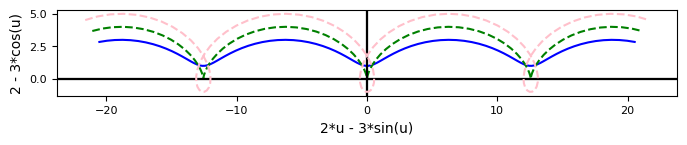

In [8]:
fig, axes = plt.subplots(1,1 ,figsize=(8,3))
a = 2
b  = 1
plot2d(axes, u, (-10, 10, 100), a*u - b*sp.sin(u), a - b*sp.cos(u))
b=2
plot2d(axes, u, (-10, 10, 100), a*u - b*sp.sin(u), a - b*sp.cos(u), color='green', fmt='--')
b=3
plot2d(axes, u, (-10, 10, 100), a*u - b*sp.sin(u), a - b*sp.cos(u), color='pink', fmt='--')

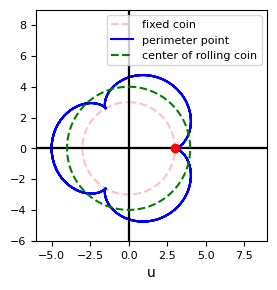

In [9]:
# Ex 5.(a)

fig, axes = plt.subplots(1,1 ,figsize=(8,3))
a = 3
b  = 1
# b = -1
plot2d(axes, u, (0, 2*np.pi, 1000), a*sp.sin(u), a*sp.cos(u), color='pink', fmt='--', label='fixed coin')
plot2d(axes, u, (-10, 10, 1000), (a + b)*sp.cos(u) - b*sp.cos((a+b)*u/b), (a+b)*sp.sin(u) - b*sp.sin((a+b)*u/b), label='perimeter point')
plot2d(axes, u, (0, 2*np.pi, 1000), (a+b)*sp.sin(u), (a+b)*sp.cos(u), color='green', fmt='--', label='center of rolling coin')
axes.set_ylim(-6,9)
axes.set_xlim(-6,9)
axes.legend(loc='upper right', fontsize=8)
axes.set_xlabel('u')
axes.set_ylabel('')
axes.plot(a, 0,'ro')


<lambdifygenerated-35>:2: RuntimeWarning: invalid value encountered in log
  return -log((tan(u)**(-1.0)) + (sin(u)**(-1.0))) + cos(u)


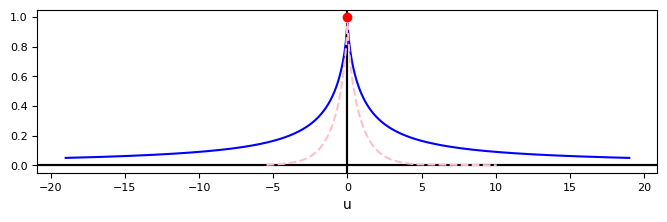

In [25]:
# Ex 5.(b)

fig, axes = plt.subplots(1,1 ,figsize=(8,3))

a = 1

# This is correct for u = distance walked by man
plot2d(axes, u, (-20, 20, 1000), u - (u/(sp.sqrt(u**2 + 1))), 1/(sp.sqrt(u**2 + 1)), yaspect=10.0)


# This is correct for u = angle made by leash on x-axis
# see 
plot2d(axes, u, (-np.pi+np.pi*(1/100000), np.pi-np.pi*(1/100000), 1000), sp.cos(u) - sp.ln(sp.csc(u)+ sp.cot(u)), sp.sin(u), yaspect=10.0, color='pink', fmt='--')


# plot2d(axes, u, (np.pi/2, np.pi, 1000), (-1/sp.tan(u)) + sp.cos(u), sp.sin(u), yaspect=3.0, color = 'pink')
axes.set_xlabel('u')
axes.set_ylabel('')
axes.plot(0, a, 'ro')

# 2.2 : Scalar functions of several variables

Functions of the form z = f(x,y), $z \in R$

We can write:

$graph(f) = \begin{bmatrix}\vec{x} \\ f(\vec{x})\end{bmatrix}$, most useful when we 1 or 2 inputs.

Output()

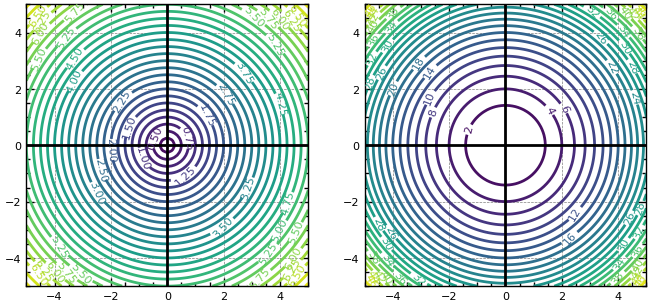

In [31]:
# Scalar functions of several variables
x, y = sp.symbols('x y')
def plot_contour(ax: plt.Axes, params, zf, *, linspace=(-1,1,100), levels=20, yaspect=1.0):
    _ = np.linspace(linspace[0], linspace[1], linspace[2], dtype=np.float32)
    nx, ny = np.meshgrid(_, _)

    zfl = sp.lambdify(params, zf)
    nz = zfl(nx, ny)

    cs = ax.contour(nx,ny,nz, levels)
    ax.clabel(cs, fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')    
    ax.set_aspect(yaspect, anchor='W')


def plot3d_k3d_surface(params, zf, *, linspace=(-5,5,100)):
    _ = np.linspace(linspace[0], linspace[1], linspace[2], dtype=np.float32)
    nx, ny = np.meshgrid(_, _)

    zfl = sp.lambdify(params, zf)
    nz = zfl(nx, ny)

    return k3d.surface(nz,
                          color=0x006394,
                          wireframe=True,
                          xmin=0, xmax=10,
                          ymin=0, ymax=10)



def plot3d_mat(ax: plt.Axes, params, zf, xf=None, yf=None, *, linspace=(-5,5,100), ):
    _ = np.linspace(linspace[0], linspace[1], linspace[2], dtype=np.float32)
    nx, ny = np.meshgrid(_, _)

    zfl = sp.lambdify(params, zf)

    if xf is None:
        xfl = sp.lambdify(params, xf)
        final_nx = xfl(nx, ny)
    else:
        final_nx = nx
    

    if yf is None:
        yfl = sp.lambdify(params, yf)
        final_ny = xfl(nx, ny)
    else:
        final_ny = ny
    

    nz = zfl(nx, ny)
    ax.plot_surface(nx, ny, nz,  rstride=4, cstride=4, color='b')



fig, axes = plt.subplots(1,2)    


# _ = np.linspace(-1, 1, 100)
# x, y = np.meshgrid(_, _)
z = sp.sqrt(x**2 + y**2)
plot_contour(axes[0], (x,y), z, levels=30, linspace=(-5,5,100))
plot_contour(axes[1], (x,y), x**2 + y**2, levels=30, linspace=(-5,5,100))

surface = plot3d_k3d_surface((x,y), z)

plot = k3d.plot()
plot += surface
plot.display()


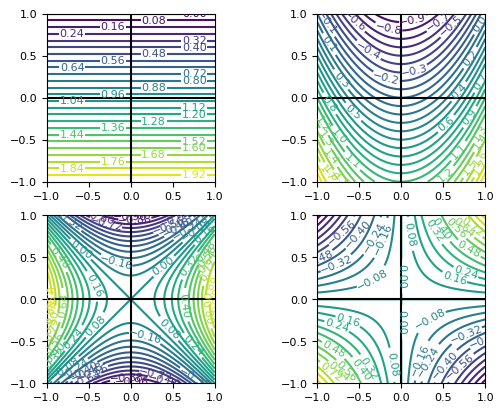

In [28]:
# Ex 2.1.9

fig, axes = plt.subplots(2,2)    


# _ = np.linspace(-1, 1, 100)
# x, y = np.meshgrid(_, _)
plot_contour(axes[0][0], (x,y), 1-y, levels=30)
plot_contour(axes[0][1], (x,y), x**2-y, levels=30)
plot_contour(axes[1][0], (x,y), x**2-y**2, levels=30)
plot_contour(axes[1][1], (x,y), x*y, levels=30)

# Ex 2.1.10: Hyperboloid

(a) $z^2 - 1 = x^2 + y^2$ and (b) $z^2 + 1 = x^2 + y^2$

Both graphs result in circles whose radius increases with increasing z. However, in (a) the minimum radius hits 0 at z = +1 on the z-positive, z = -1 on z-negative.

The function has no real values between z = -1 to 1.

The graph b at z = 0 has a circle of radius 1, and this circle connects the negative / positive z surfaces. 

In [34]:
# Ex 2.1.10

z1 = sp.sqrt(x**2 + y**2 - 1)

surface1 = plot3d_k3d_surface((x,y), z1, linspace=(-4,4,100))
surface2 = plot3d_k3d_surface((x,y), -z1, linspace=(-4,4,100))

plot = k3d.plot()
plot += surface1
plot += surface2
plot.display()

<lambdifygenerated-55>:2: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(x**2 + y**2 - 1)
<lambdifygenerated-56>:2: RuntimeWarning: invalid value encountered in sqrt
  return -sqrt(x**2 + y**2 - 1)


Output()

In [ ]:
# Ex 11



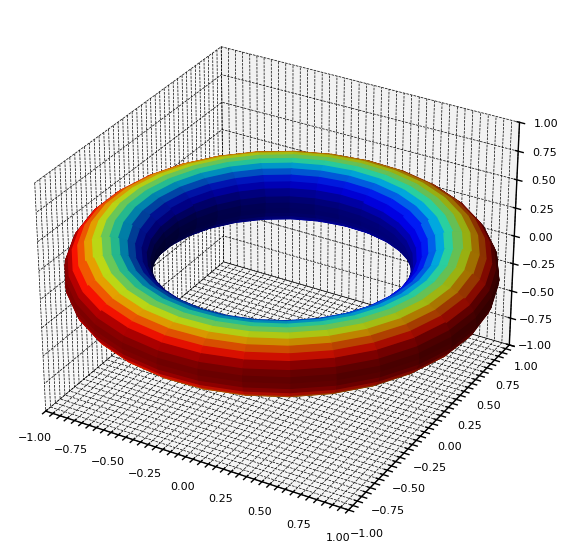

In [35]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# Generate torus mesh
angle = np.linspace(0, 2 * np.pi, 32)
theta, phi = np.meshgrid(angle, angle)
r, R = .25, 1.
X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)
Z = r * np.sin(phi)

colorfunction=(X**2+Y**2)
norm=mcolors.Normalize(colorfunction.min(),colorfunction.max())

# Display the mesh
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, facecolors=cm.jet(norm(colorfunction)))
plt.show()

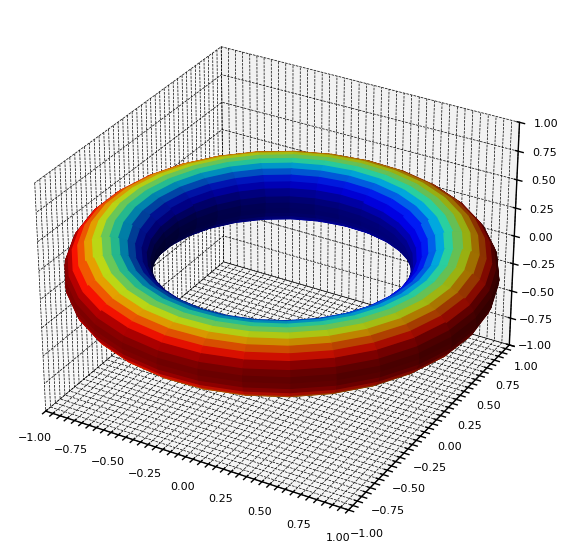

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# Generate torus mesh
angle = np.linspace(0, 2 * np.pi, 32)
theta, phi = np.meshgrid(angle, angle)
r, R = .25, 1.
X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)
Z = r * np.sin(phi)

colorfunction=(X**2+Y**2)
norm=mcolors.Normalize(colorfunction.min(),colorfunction.max())

# Display the mesh
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, facecolors=cm.jet(norm(colorfunction)))
plt.show()

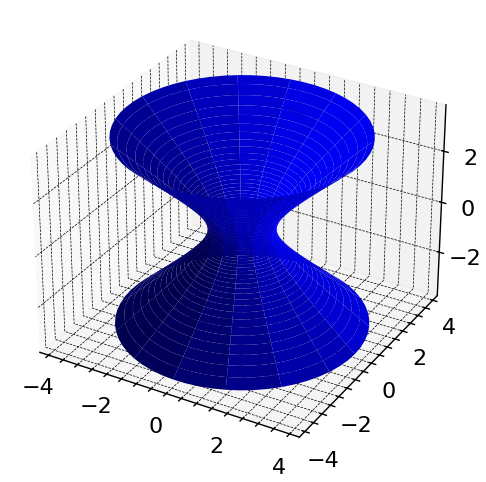

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=plt.figaspect(1))  # Square figure
ax = fig.add_subplot(111, projection='3d')

r=1;
u=np.linspace(-2,2,200);
v=np.linspace(0,2*np.pi,60);
[u,v]=np.meshgrid(u,v);

a = 1
b = 1
c = 1

x = a*np.cosh(u)*np.cos(v)
y = b*np.cosh(u)*np.sin(v)
z = c*np.sinh(u)

ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b')

plt.show()

# Ex 2.1.11 Torus

$\vec{g}(s,t) = \begin{bmatrix}(2 + cos(t))cos(s) \\ (2 + cos(t)sin(s) \\ sin(t) \end{bmatrix}$

$0 \le s, t \le 2\pi$

At a given for any given t, $t_0$, $z = sin(t_0)$ is between 0 and 1, and $z = sin(t_0) = sin(\pi - t_0) = -sin(\pi + t_0) = -sin(2\pi - t_0)$

At this value of t, x, and y form a circle of radius (2 + cos(t0)) i.e. a circle of radius (2 + cos(t0)). Also there is a corresponding circle for negative z. The circles vary in size from 1 to 3 radius. When z = 1 or -1 (t = pi/2 or -pi/2), cos(t) = 0, i.e. radius is 2 and height is maximum / min. When z = 0 sin(t) = 0 => t = 0 or pi at t = 0, cos(t) = 1, and at t = pi, cos(t) = -1, so the circles are largest in the center.

From 0 -> pi/2 : z = sin(t) increases from 0 to 1, cos(t) > 0 decreasing - circle radius decreases from 3 to 2. 

From pi/2 -> pi : z = sin(t) decreases from 1 to 0, cos(t) < 0 increasing - circle radius decreases from 2 to 1

From pi -> 3pi/2 : z = sin(t) decreases from 0 to -1, cos(t) < 0 decreasing - circle radius decreases from 2 to 1

From 3pi/2 -> 2pi : z = sin(t) increases from -1 to 0, cos(t) > 0 increasing - circle radius increases from 1 to 2

Algebraic equation:




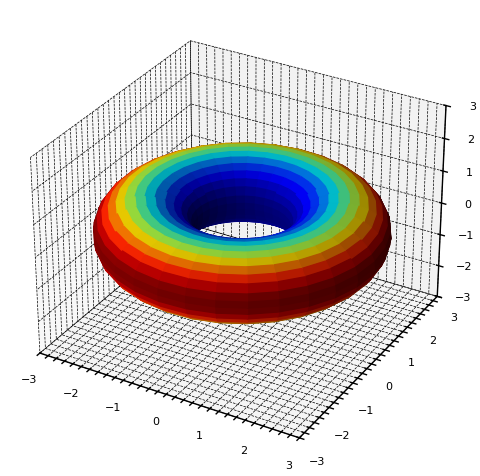

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np



def plot3d_mat_x(ax: plt.Axes, params, zf, xf=None, yf=None, *, linspace=(-5,5,100), ):
    _ = np.linspace(linspace[0], linspace[1], linspace[2], dtype=np.float32)
    nx, ny = np.meshgrid(_, _)

    zfl = sp.lambdify(params, zf)

    if xf is None:
        xfl = sp.lambdify(params, xf)
        final_nx = xfl(nx, ny)
    else:
        final_nx = nx
    

    if yf is None:
        yfl = sp.lambdify(params, yf)
        final_ny = xfl(nx, ny)
    else:
        final_ny = ny
    

    nz = zfl(nx, ny)
    ax.plot_surface(nx, ny, nz,  rstride=4, cstride=4, color='b')



fig = plt.figure(figsize=plt.figaspect(1))  # Square figure
ax = fig.add_subplot(111, projection='3d')

angle = np.linspace(0, 2 * np.pi, 32)
theta, phi = np.meshgrid(angle, angle)
r, R = 1, 2.
X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)
Z = r * np.sin(phi)

colorfunction=(X**2+Y**2)
norm=mcolors.Normalize(colorfunction.min(),colorfunction.max())

# Display the mesh
# fig = plt.figure(figsize=(7, 7))
# ax = fig.add_subplot(projection='3d')
ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_xlim3d(-3, 3)
ax.set_ylim3d(-3, 3)
ax.set_zlim3d(-3, 3)
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, facecolors=cm.jet(norm(colorfunction)))

# plot3d_mat_x(ax, (u,v), z, x, y)

# fig.show()

Text(0.5, 0.92, 'twisted cubic (t,t^2,t^3)')

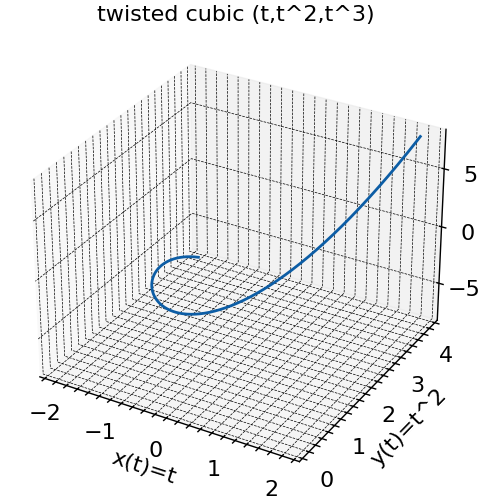

In [39]:
# Twisted Cubic


fig = plt.figure(figsize=plt.figaspect(1))  # Square figure
ax = fig.add_subplot(111, projection='3d')


t=np.linspace(-2,2,500);
x=t
y=t**2
z=t**3
ax.plot(x,y,z), 
ax.set_xlabel('x(t)=t')
ax.set_ylabel('y(t)=t^2')
ax.set_zlabel('z(t)=t^3')
ax.set_title('twisted cubic (t,t^2,t^3)')

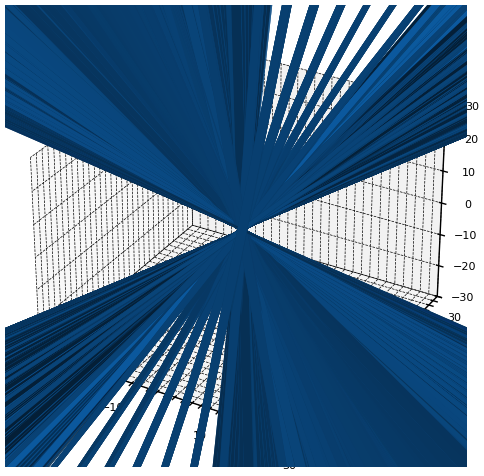

In [40]:
# Ex 2.12 hyperboloid



fig = plt.figure(figsize=plt.figaspect(1))  # Square figure
ax = fig.add_subplot(111, projection='3d')

_ = np.linspace(-5, 5, 1000)
s, t = np.meshgrid(_, _)
X = (s*t + 1)/(s*t - 1)
Y = (s - t)/(s*t - 1)
Z = (s + t)/(s*t - 1)

# colorfunction=(X**2+Y**2)
# norm=mcolors.Normalize(colorfunction.min(),colorfunction.max())

# Display the mesh
# fig = plt.figure(figsize=(7, 7))
# ax = fig.add_subplot(projection='3d')
ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_xlim3d(-30, 30)
ax.set_ylim3d(-30, 30)
ax.set_zlim3d(-30, 30)
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1)


/var/folders/hj/qnzn_y317sl4c38lvpbt0r880000gn/T/ipykernel_34398/1242770892.py:26: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c
/var/folders/hj/qnzn_y317sl4c38lvpbt0r880000gn/T/ipykernel_34398/1242770892.py:26: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c


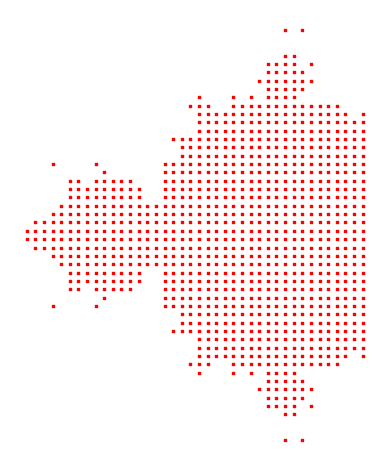

In [23]:
   
def z(n, c):    
     if n == 0:    
         return 0    
     else:    
         return z(n - 1, c) ** 2 + c   
     
def sequence(c, z = 0):  
    while True:  
        yield z  
        z = z ** 2 + c  

def mandelbrot(candidate):  
    return sequence(z = 0, c = candidate)  
  
def julia(candidate, parameter):  
    return sequence(z = candidate, c = parameter)  

def complex_matrix(x_min, x_max, y_min, y_max, pixel_density):  
    re1 = np.linspace(x_min, x_max, int((x_max - x_min) * pixel_density))  
    im1 = np.linspace(y_min, y_max, int((y_max - y_min) * pixel_density))  
    return re1[np.newaxis, :] + im1[:, np.newaxis] * 1j  

def is_stable(c, num_iterations):  
    z = 0  
    for _ in range(num_iterations):  
        z = z ** 2 + c  
    return abs(z) <= 2  

def get_members(c, num_iterations):  
    mask = is_stable(c, num_iterations)  
    return c[mask]  

c = complex_matrix(-1.5, 0.25, -2, 2, pixel_density = 25)  
members = get_members(c, num_iterations = 20)  
  
plt.scatter(members.real, members.imag, color = "Red", marker = ",", s = 1)  
plt.gca().set_aspect("equal")  
plt.axis("off")  
plt.tight_layout()  
plt.show()  